<a href="https://colab.research.google.com/github/Patsonu63/qiskit-algorithms/blob/main/Qiskit_Aer_simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 112.6 MB/s eta 0:00:00


In [3]:
from qiskit_aer import AerSimulator


{'01': 55, '11': 436, '10': 58, '00': 451}


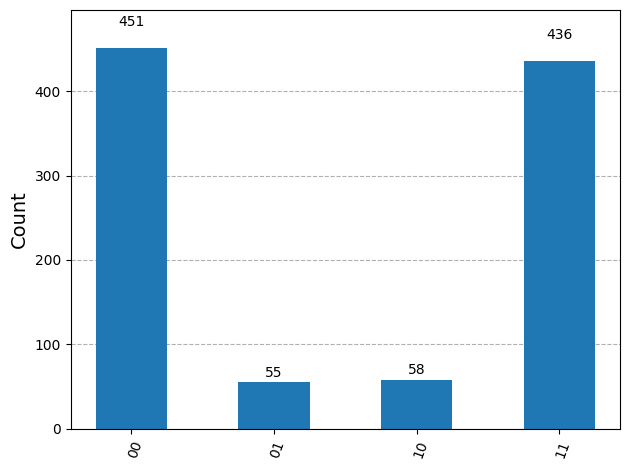

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

# Apply quantum gates
qc.h(0)        # Hadamard gate on qubit 0 (creates superposition)
qc.cx(0, 1)    # CNOT gate (control=0, target=1) - creates entanglement
qc.x(1)        # Pauli-X gate (bit flip) on qubit 1
qc.y(0)        # Pauli-Y gate on qubit 0
qc.z(1)        # Pauli-Z gate on qubit 1
qc.s(0)        # Phase gate (S gate) on qubit 0
qc.t(1)        # T gate on qubit 1
qc.rx(0.5, 0)  # Rotation around X-axis by 0.5 radians on qubit 0
qc.ry(0.3, 1)  # Rotation around Y-axis by 0.3 radians on qubit 1

# Measure the qubits
qc.measure_all()

# Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1000).result()

# Display results
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

In [7]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info.operators import Operator

# Define a custom 2-qubit gate
custom_matrix = np.array([
    [1, 0, 0, 0],
    [0, 0, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1]
])
custom_gate = Operator(custom_matrix)

# Create circuit and apply custom gate
qc = QuantumCircuit(2)
qc.unitary(custom_gate, [0, 1], label='custom')
qc.draw('mpl')

MissingOptionalLibraryError: "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."

In [9]:
!pip install matplotlib

In [11]:
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt  # Required for 'mpl' backend

# Create a simple circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

# Try drawing with different methods
try:
    # Method 1: Matplotlib (prettiest)
    qc.draw('mpl')
    plt.show()  # Needed in some environments to display the plot
except:
    try:
        # Method 2: ASCII art
        print("\nText-based circuit:")
        print(qc.draw())
    except Exception as e:
        print(f"Could not draw circuit: {e}")


Text-based circuit:
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘


In [13]:
X = np.array([[0, 1], [1, 0]])

In [14]:
H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

In [15]:
CNOT = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0]
])

In [17]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info.operators import Operator

# Define a custom 2-qubit gate
custom_matrix = np.array([
    [1, 0, 0, 0],
    [0, 0, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1]
])
custom_gate = Operator(custom_matrix)

# Create circuit and apply custom gate
qc = QuantumCircuit(2)
qc.unitary(custom_gate, [0, 1], label='custom')
# Text-based drawing
print(qc.draw())  # Default text output

# Or for a slightly prettier text output
print(qc.draw('text'))




     ┌─────────┐
q_0: ┤0        ├
     │  custom │
q_1: ┤1        ├
     └─────────┘
     ┌─────────┐
q_0: ┤0        ├
     │  custom │
q_1: ┤1        ├
     └─────────┘


In [18]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

In [19]:
simulator = AerSimulator()


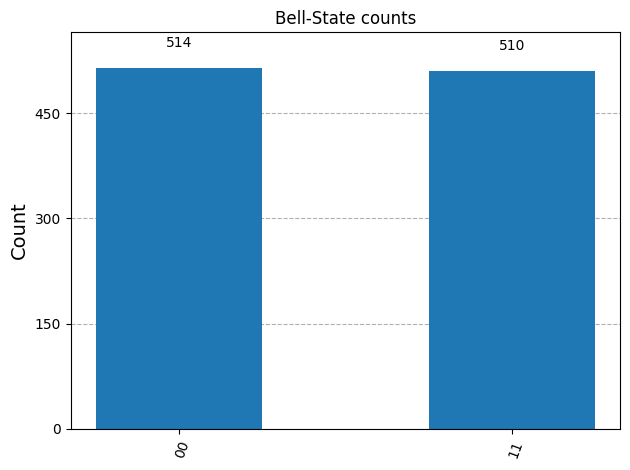

In [20]:
# Create circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

# Transpile for simulator
simulator = AerSimulator()
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

In [22]:
# Run and get memory
result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['00', '00', '00', '11', '11', '00', '00', '11', '00', '11']


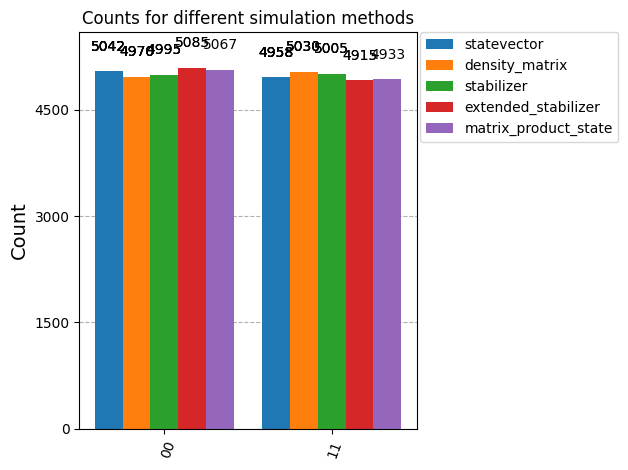

In [23]:
# Increase shots to reduce sampling variance
shots = 10000



# Statevector simulation method
sim_statevector = AerSimulator(method='statevector')
job_statevector = sim_statevector.run(circ, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)

# Stabilizer simulation method
sim_stabilizer = AerSimulator(method='stabilizer')
job_stabilizer = sim_stabilizer.run(circ, shots=shots)
counts_stabilizer = job_stabilizer.result().get_counts(0)


# Extended Stabilizer method
sim_extstabilizer = AerSimulator(method='extended_stabilizer')
job_extstabilizer = sim_extstabilizer.run(circ, shots=shots)
counts_extstabilizer = job_extstabilizer.result().get_counts(0)

# Density Matrix simulation method
sim_density = AerSimulator(method='density_matrix')
job_density = sim_density.run(circ, shots=shots)
counts_density = job_density.result().get_counts(0)

# Matrix Product State simulation method
sim_mps = AerSimulator(method='matrix_product_state')
job_mps = sim_mps.run(circ, shots=shots)
counts_mps = job_mps.result().get_counts(0)


plot_histogram([ counts_statevector,counts_stabilizer ,counts_extstabilizer, counts_density, counts_mps],
               title='Counts for different simulation methods',
               legend=[ 'statevector',
                       'density_matrix','stabilizer','extended_stabilizer', 'matrix_product_state'])

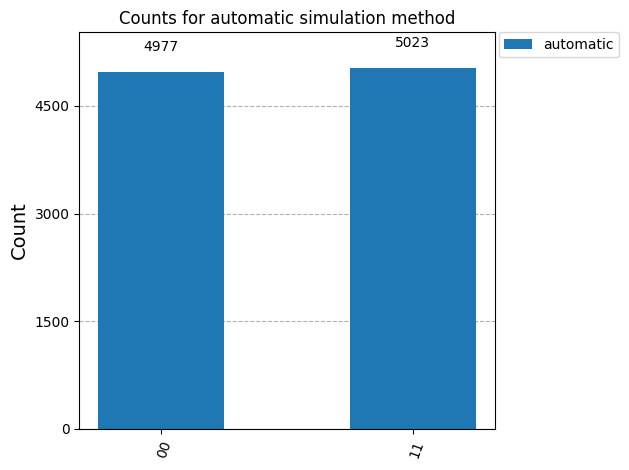

In [24]:
# automatic
sim_automatic = AerSimulator(method='automatic')
job_automatic = sim_automatic.run(circ, shots=shots)
counts_automatic = job_automatic.result().get_counts(0)

plot_histogram([counts_automatic], title='Counts for automatic simulation method',legend=[ 'automatic'])

In [25]:
from qiskit_aer import AerError

# Initialize a GPU backend
# Note that the cloud instance for tutorials does not have a GPU
# so this will raise an exception.
try:
    simulator_gpu = AerSimulator(method='statevector', device='GPU')

except AerError as e:
    print(e)

In [26]:
from qiskit_aer import AerError

# Initialize a GPU backend
# Note that the cloud instance for tutorials does not have a GPU
# so this will raise an exception.
try:
    simulator_gpu = AerSimulator(method='tensor_network', device='GPU')

except AerError as e:
    print(e)

"Invalid simulation method tensor_network. Available methods are: ('automatic', 'statevector', 'density_matrix', 'stabilizer', 'matrix_product_state', 'extended_stabilizer', 'unitary', 'superop')"


In [27]:
simulator = AerSimulator(method='statevector')
simulator.set_options(precision='single')

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
print(counts)

{'11': 492, '00': 532}


In [28]:
# Construct quantum circuit without measure
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.save_statevector()

# Transpile for simulator
simulator = AerSimulator(method='statevector')
circ = transpile(circ, simulator)

# Run and get statevector
result = simulator.run(circ).result()
statevector = result.get_statevector(circ)

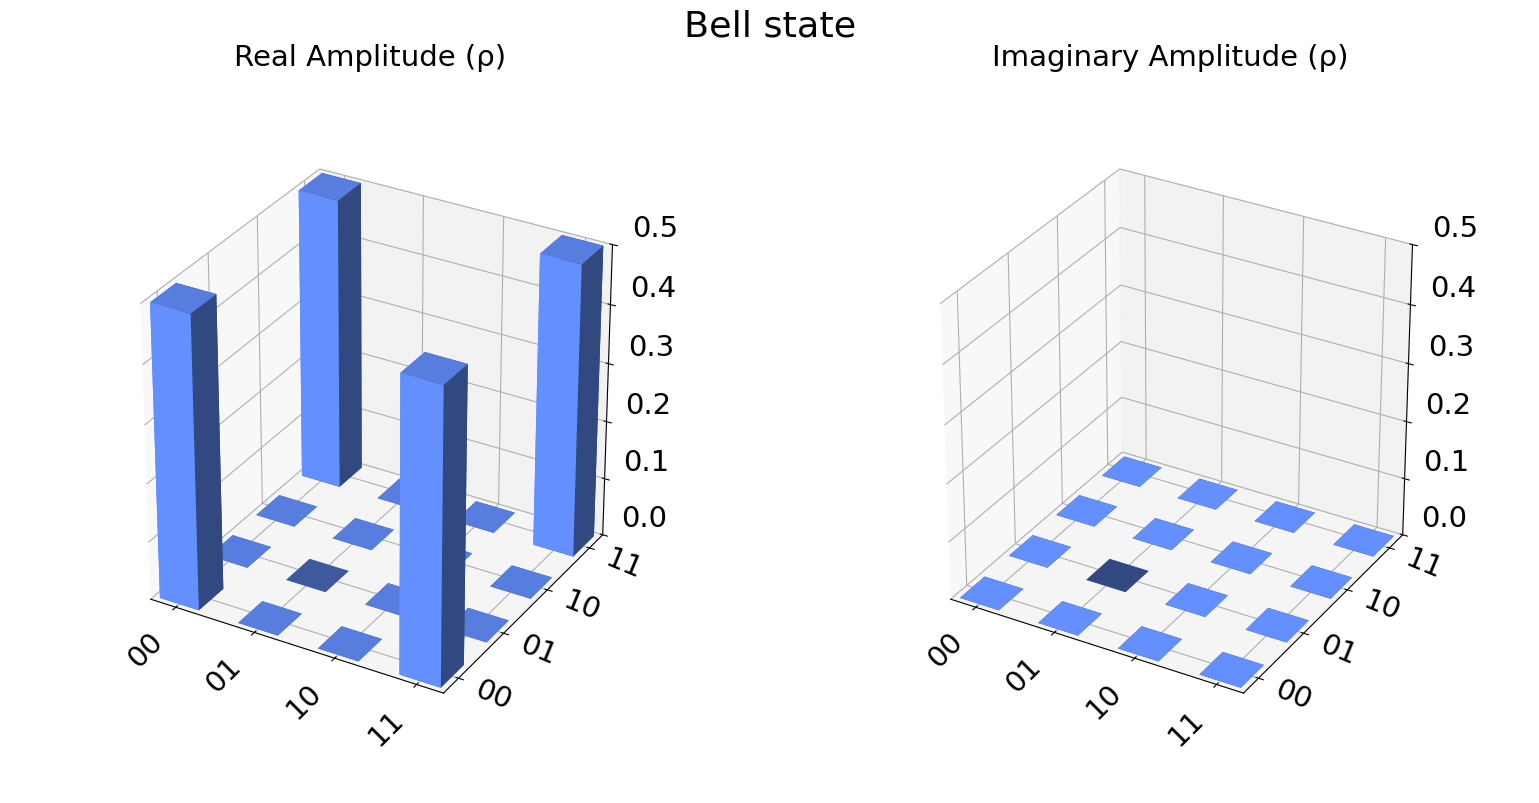

In [29]:
plot_state_city(statevector, title='Bell state')


In [30]:
# Construct quantum circuit without measure
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.save_unitary()

# Transpile for simulator
simulator = AerSimulator(method = 'unitary')
circ = transpile(circ, simulator)

# Run and get unitary
result = simulator.run(circ).result()
unitary = result.get_unitary(circ)
print("Circuit unitary:\n", np.asarray(unitary).round(5))

Circuit unitary:
 [[ 0.70711+0.j  0.70711-0.j  0.     +0.j  0.     +0.j]
 [ 0.     +0.j  0.     +0.j  0.70711+0.j -0.70711+0.j]
 [ 0.     +0.j  0.     +0.j  0.70711+0.j  0.70711-0.j]
 [ 0.70711+0.j -0.70711+0.j  0.     +0.j  0.     +0.j]]


In [31]:
# Construct quantum circuit without measure
steps = 5
circ = QuantumCircuit(1)
for i in range(steps):
    circ.save_statevector(label=f'psi_{i}')
    circ.rx(i * np.pi / steps, 0)
circ.save_statevector(label=f'psi_{steps}')

# Transpile for simulator
simulator = AerSimulator(method= 'automatic')
circ = transpile(circ, simulator)

# Run and get saved data
result = simulator.run(circ).result()
data = result.data(0)
data

{'psi_5': Statevector([-1.+0.00000000e+00j,  0.-5.55111512e-17j],
             dims=(2,)),
 'psi_4': Statevector([-0.30901699+0.j        ,  0.        -0.95105652j],
             dims=(2,)),
 'psi_3': Statevector([0.58778525+0.j        , 0.        -0.80901699j],
             dims=(2,)),
 'psi_2': Statevector([0.95105652+0.j        , 0.        -0.30901699j],
             dims=(2,)),
 'psi_1': Statevector([1.+0.j, 0.+0.j],
             dims=(2,)),
 'psi_0': Statevector([1.+0.j, 0.+0.j],
             dims=(2,))}

In [32]:
# Generate a random statevector
num_qubits = 2
psi = qi.random_statevector(2 ** num_qubits, seed=100)

# Set initial state to generated statevector
circ = QuantumCircuit(num_qubits)
circ.set_statevector(psi)
circ.save_state()

# Transpile for simulator
simulator = AerSimulator(method='statevector')
circ = transpile(circ, simulator)

# Run and get saved data
result = simulator.run(circ).result()
result.data(0)


{'statevector': Statevector([-0.49859823-0.41410205j,  0.12480824+0.46132192j,
               0.33634191+0.30214216j,  0.234309  +0.3036574j ],
             dims=(2, 2))}

In [33]:
# Use initilize instruction to set initial state
circ = QuantumCircuit(num_qubits)
circ.initialize(psi, range(num_qubits))
circ.save_state()

# Transpile for simulator
simulator = AerSimulator(method= 'statevector')
circ = transpile(circ, simulator)

# Run and get result data
result = simulator.run(circ).result()
result.data(0)

{'statevector': Statevector([-0.49859823-0.41410205j,  0.12480824+0.46132192j,
               0.33634191+0.30214216j,  0.234309  +0.3036574j ],
             dims=(2, 2))}

In [34]:
num_qubits = 2
rho = qi.random_density_matrix(2 ** num_qubits, seed=100)
circ = QuantumCircuit(num_qubits)
circ.set_density_matrix(rho)
circ.save_state()

# Transpile for simulator
simulator = AerSimulator(method='density_matrix')
circ = transpile(circ, simulator)

# Run and get saved data
result = simulator.run(circ).result()
result.data(0)

{'density_matrix': DensityMatrix([[ 0.2075308 +0.j        ,  0.13161422-0.01760848j,
                  0.0442826 +0.07742704j,  0.04852053-0.01303171j],
                [ 0.13161422+0.01760848j,  0.20106116+0.j        ,
                  0.02568549-0.03689812j,  0.0482903 -0.04367912j],
                [ 0.0442826 -0.07742704j,  0.02568549+0.03689812j,
                  0.39731492+0.j        , -0.01114025-0.13426423j],
                [ 0.04852053+0.01303171j,  0.0482903 +0.04367912j,
                 -0.01114025+0.13426423j,  0.19409312+0.j        ]],
               dims=(2, 2))}

In [37]:
# Generate a random Clifford C
num_qubits = 2
stab = qi.random_clifford(num_qubits, seed=100)

# Set initial state to stabilizer state C|0>
circ = QuantumCircuit(num_qubits)
circ.set_stabilizer(stab)
circ.save_state()

# Transpile for simulator
simulator = AerSimulator(method= "stabilizer")
circ = transpile(circ, simulator)

# Run and get saved data
result = simulator.run(circ).result()
result.data(0)

{'stabilizer': StabilizerState(['+XZ', '-YX'])}

In [38]:
# Generate a random unitary
num_qubits = 2
unitary = qi.random_unitary(2 ** num_qubits, seed=100)

# Set initial state to unitary
circ = QuantumCircuit(num_qubits)
circ.set_unitary(unitary)
circ.save_state()

# Transpile for simulator
simulator = AerSimulator(method='unitary')
circ = transpile(circ, simulator)

# Run and get saved data
result = simulator.run(circ).result()
result.data(0)

{'unitary': Operator([[-0.44885724-0.26721573j,  0.10468034-0.00288681j,
             0.4631425 +0.15474915j, -0.11151309-0.68210936j],
           [-0.37279054-0.38484834j,  0.3820592 -0.49653433j,
             0.14132327-0.17428515j,  0.19643043+0.48111423j],
           [ 0.2889092 +0.58750499j,  0.39509694-0.22036424j,
             0.49498355+0.2388685j ,  0.25404989-0.00995706j],
           [ 0.01830684+0.10524311j,  0.62584001+0.01343146j,
            -0.52174025-0.37003296j,  0.12232823-0.41548904j]],
          input_dims=(2, 2), output_dims=(2, 2))}

In [39]:
import qiskit
qiskit.__version__

'2.0.2'